In [ ]:
ENDPOINT = 'https://aishwanshikafaceapi.cognitiveservices.azure.com/'
SUBSCRIPTION_KEY = 'ec25871801b6448dbead16f5ee160d14'
FACE_API_URL = ENDPOINT + "/face/v1.0/detect"

In [ ]:
import pprint

import numpy as np
import matplotlib.pyplot as plt
import requests
from matplotlib import patches
from PIL import Image

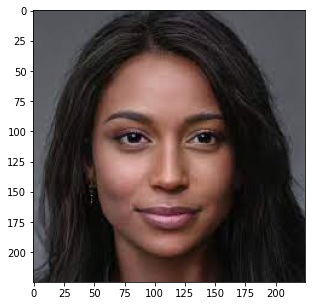

In [ ]:
image_filepath = '/content/download.jpg'
pil_image = Image.open(image_filepath, 'r')

# Show Image
plt.figure(figsize=(10, 5))
plt.imshow(pil_image)
plt.show()

In [ ]:
headers = {
    'Ocp-Apim-Subscription-Key': SUBSCRIPTION_KEY,
    'Content-Type': 'application/octet-stream'
}

params = {
    'returnFaceId': 'false',
    'returnFaceLandmarks': 'true',
    'returnFaceAttributes': 'age,gender,glasses,smile'
}

image_data = open(image_filepath, 'rb').read()

response = requests.post(
    FACE_API_URL,
    params=params,
    headers=headers,
    data=image_data
)

In [ ]:
response.status_code

200

In [ ]:
response_data = response.json()
pprint.pprint(response_data)

[{'faceAttributes': {'age': 27.0,
                     'gender': 'female',
                     'glasses': 'NoGlasses',
                     'smile': 0.907},
  'faceLandmarks': {'eyeLeftBottom': {'x': 83.0, 'y': 110.4},
                    'eyeLeftInner': {'x': 92.9, 'y': 107.3},
                    'eyeLeftOuter': {'x': 73.4, 'y': 106.1},
                    'eyeLeftTop': {'x': 83.4, 'y': 101.5},
                    'eyeRightBottom': {'x': 141.5, 'y': 109.8},
                    'eyeRightInner': {'x': 132.0, 'y': 107.7},
                    'eyeRightOuter': {'x': 151.4, 'y': 106.4},
                    'eyeRightTop': {'x': 141.1, 'y': 101.3},
                    'eyebrowLeftInner': {'x': 97.8, 'y': 92.0},
                    'eyebrowLeftOuter': {'x': 58.5, 'y': 91.8},
                    'eyebrowRightInner': {'x': 125.1, 'y': 92.7},
                    'eyebrowRightOuter': {'x': 159.8, 'y': 88.9},
                    'mouthLeft': {'x': 84.0, 'y': 165.0},
                    'mouthRigh

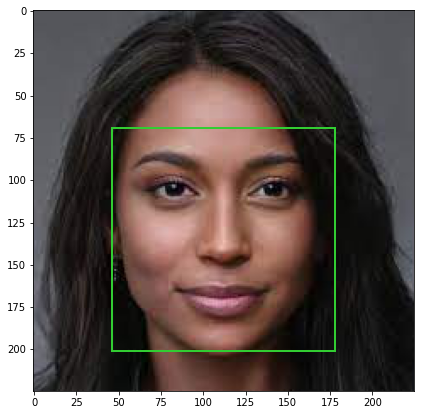

In [ ]:
plt.figure(figsize=(15, 7))
plt.imshow(pil_image)
for detected_face in response_data:
    rect = patches.Rectangle(
        [
            detected_face['faceRectangle']['left'],
            detected_face['faceRectangle']['top']
        ],
        detected_face['faceRectangle']['width'],
        detected_face['faceRectangle']['height'],
        linewidth=2, edgecolor='limegreen', facecolor='none'
    )
    ax = plt.gca()
ax.add_patch(rect)
plt.show()

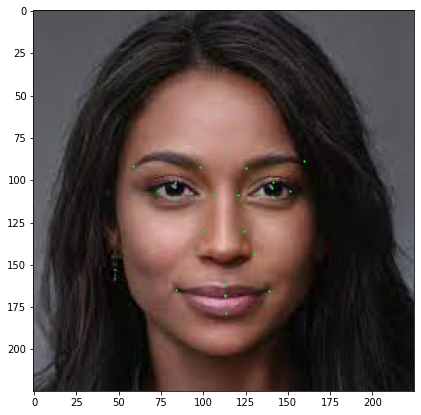

In [ ]:
plt.figure(figsize=(15, 7))
plt.imshow(pil_image)
for detected_face in response_data:
    for landmark in detected_face['faceLandmarks'].values():
        plt.scatter([landmark['x']], [landmark['y']], color='limegreen', s=2)
plt.show()

In [ ]:
def call_face_api(image_filepath):
    params = {
        'returnFaceId': 'false',
        'returnFaceLandmarks': 'true',
        'returnFaceAttributes': 'mask',
        'detectionModel': 'detection_03'
    }

    image_data = open(image_filepath, 'rb').read()

    response = requests.post(
        FACE_API_URL,
        params=params,
        headers=headers,
        data=image_data
    )
    response_data = response.json()
    return response_data


def plot_image_with_mask_label(image_filepath):
    response_data = call_face_api(image_filepath)
    pil_image = Image.open(image_filepath, 'r')
    plt.figure(figsize=(15, 7))
    plt.imshow(pil_image)
    for detected_face in response_data:
        rectangle_data =  detected_face['faceRectangle']
        x = rectangle_data['left']
        y = rectangle_data['top']
        w = rectangle_data['width']
        h = rectangle_data['height']
        if detected_face['faceAttributes']['mask']['type'] == 'noMask':
            label_str = "No Mask"
            color_str = "red"
        else:
            label_str = "Wearing Mask"
            color_str = "limegreen"
        rect = patches.Rectangle(
            [x, y], w, h,
            linewidth=2, edgecolor=color_str, facecolor='none'
        )
        ax = plt.gca()
        plt.text(
            x,
            y + h + 60,
            label_str,
            size=15,
            c=color_str
        )
    ax.add_patch(rect)
    plt.show()

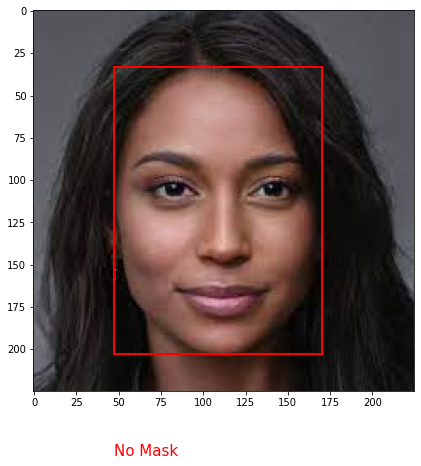

In [ ]:
plot_image_with_mask_label('/content/download.jpg')

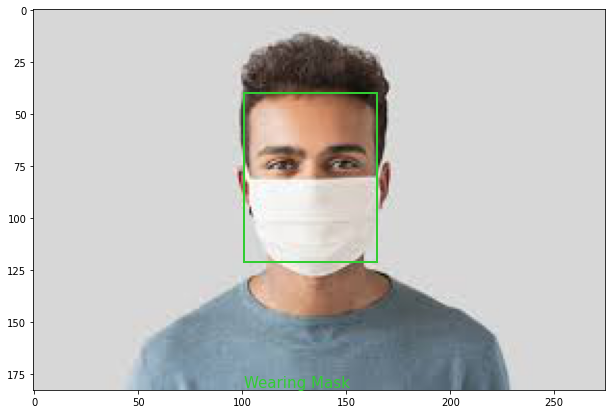

In [ ]:
plot_image_with_mask_label('/content/download (1).jpg')

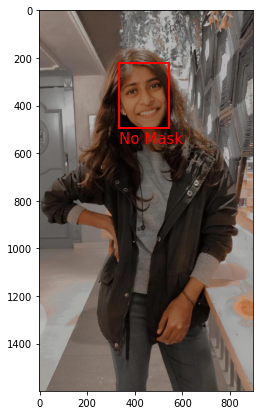

In [ ]:
plot_image_with_mask_label('/content/WhatsApp Image 2022-01-18 at 1.41.38 PM.jpeg')